# Data Analysis of Fuel Economy data 

## Data: 

__Fuel Economy data contains the following features:__
* Model – vehicle make and model
* Displ – engine displacement in liters
* Cyl – number of engine cylinders
* Trans – transmission type plus number of gears
    >- Auto - Automatic
    >- Man - Manual
    >- SemiAuto - Semi-Automatic
    >- SCV - Selectable Continuously Variable (e.g. CVT with paddles)
    >- AutoMan - Automated Manual
    >- AMS - Automated Manual-Selectable (e.g. Automated Manual with paddles)
    >- Other - Other
    >- CVT - Continuously Variable
    >- CM3 - Creeper/Manual 3-Speed
    >- CM4 - Creeper/Manual 4-Speed
    >- C4 - Creeper/Manual 4-Speed
    >- C5 - Creeper/Manual 5-Speed
    >- Auto-S2 - Semi-Automatic 2-Speed
    >- Auto-S3 - Semi-Automatic 3-Speed
    >- Auto-S4 - Semi-Automatic 4-Speed
    >- Auto-S5 - Semi-Automatic 5-Speed
    >- Auto-S6 - Semi-Automatic 6-Speed
    >- Auto-S7 - Semi-Automatic 7-Speed
* Drive – 2-wheel Drive, 4-wheel drive/all-wheel drive
* Fuel – fuel(s)
* Cert Region –
    >- CA - California
    >- CE - Calif. + NLEV (Northeast trading area)
    >- CF - Clean Fuel Vehicle
    >- CL - Calif. + NLEV (All states)
    >- FA - Federal All Altitude
    >- FC - Tier 2 Federal and Calif.
    >- NF - CFV + NLEV(ASTR) + Calif.
    >- NL - NLEV (All states)
* Stnd – vehicle emissions standard code. See Stnd Description.
* Stnd Description – vehicle emissions standard description. See https://www.epa.gov/greenvehicles/federal-and-california-light-duty-vehicle-emissions-standards-air-pollutants
* Underhood ID – engine family or test group ID. See http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore
* Veh Class – EPA vehicle class. See http://www.fueleconomy.gov/feg/findacarhelp.shtml#epaSizeClass
* Air Pollution Score (Smog Rating) – see http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore and https://www.epa.gov/greenvehicles/smog-rating
* City MPG – city fuel economy in miles per gallon
* Hwy MPG – highway fuel economy in miles per gallon
* Cmb MPG – combined city/highway fuel economy in miles per gallon
* Greenhouse Gas Score (Greenhouse Gas Rating) – see https://www.epa.gov/greenvehicles/greenhouse-gas-rating 
* SmartWay – Yes, No, or Elite. See https://www.epa.gov/greenvehicles/consider-smartway-vehicle
* Comb CO2 – combined city/highway CO2 tailpipe emissions in grams per mile

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')

## Exploring 2008 and 2018 data:

In [3]:
#view 2008 dataset
df_08.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no


In [4]:
#view 2018 dataset
df_18.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386


### Analyze 2008 dataset:

In [5]:
df_08.shape

(2404, 18)

In [6]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [7]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.2+ KB


### Analyze 2018 dataset:

In [8]:
df_18.shape

(1611, 18)

In [9]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [10]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
Model                   1611 non-null object
Displ                   1609 non-null float64
Cyl                     1609 non-null float64
Trans                   1611 non-null object
Drive                   1611 non-null object
Fuel                    1611 non-null object
Cert Region             1611 non-null object
Stnd                    1611 non-null object
Stnd Description        1611 non-null object
Underhood ID            1611 non-null object
Veh Class               1611 non-null object
Air Pollution Score     1611 non-null int64
City MPG                1611 non-null object
Hwy MPG                 1611 non-null object
Cmb MPG                 1611 non-null object
Greenhouse Gas Score    1611 non-null int64
SmartWay                1611 non-null object
Comb CO2                1611 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 226.7+ KB


__We can observe that there is mismatch column names in the two datasets.__

## Data Cleaning

### 1. Drop Extraneous Columns:

In [11]:
# drop columns from 2008 dataset
df_08.drop(['Stnd','Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis = 1, inplace = True)

In [12]:
#confirm changes

print(df_08.columns)
df_08.head(1)

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [13]:
#drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2' ], axis = 1, inplace = True)

#confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [14]:
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

### 2. Rename columns 

* __Rename column Sales Area in 2008 dataset to Cert Region to ensure that the column names in 2008 and 2018 dataset are the same.__

In [15]:
#rename df_08 column Sales Area to Cert Region
df_08.rename(columns={'Sales Area':'Cert Region'},inplace = True)

#confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


* __Replace space with underscore and lowercase column names in 2008 and 2018 dataset to ensure there is a standard naming convension used.__

In [16]:
#replace space with underscore and lowercase labels for 2008 dataset
df_08.rename(columns = lambda x: x.strip().lower().replace(' ', '_'), inplace = True)

#confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [17]:
#replace space with underscore and lowercase labels for 2018 dataset
df_18.rename(columns = lambda x: x.strip().lower().replace(' ', '_'), inplace = True)

#confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [18]:
# confirm column labels of 2008 and 2018 dataset are identical

(df_08.columns == df_18.columns).all()

True

### 3. Filter by Certification Region 

__Filter the rows from 2008 and 2018 dataset such that Certification Region is California.__

In [19]:
# filter datasets for rows following California standards

df_08 = df_08.query('cert_region == \"CA\"')
df_18 = df_18.query('cert_region == \"CA\"')

In [20]:
# confirm only certification region is California for 2008 dataset
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [21]:
# confirm only certification region is California for 2018 dataset
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [22]:
#drop certification region from both 2008 and 2018 datasets
df_08.drop('cert_region', axis = 1, inplace = True)
df_18.drop('cert_region', axis = 1, inplace = True)

In [23]:
#confirm changes

print(df_08.shape)
df_08.head(1)

(1084, 13)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


In [24]:
#confirm changes

print(df_18.shape)
df_18.head(1)

(798, 13)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No


### 4. Drop rows with missing values

In [25]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [26]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [27]:
#drop rows with any missing values in both datasets

df_08.dropna( how = 'any', inplace = True)
df_18.dropna( how = 'any', inplace = True)

In [28]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [29]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

### 5. Delete duplicate data

In [30]:
#print the number of duplicates in 2008 and 2018 dataset

print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

23
3


In [31]:
# drop duplicates in both datasets
df_08.drop_duplicates(keep=False, inplace=True)
df_18.drop_duplicates(keep=False, inplace=True)

In [32]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

0
0


### 6. Inspect Data types for the two datasets

In [33]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 2400
Data columns (total 13 columns):
model                   963 non-null object
displ                   963 non-null float64
cyl                     963 non-null object
trans                   963 non-null object
drive                   963 non-null object
fuel                    963 non-null object
veh_class               963 non-null object
air_pollution_score     963 non-null object
city_mpg                963 non-null object
hwy_mpg                 963 non-null object
cmb_mpg                 963 non-null object
greenhouse_gas_score    963 non-null object
smartway                963 non-null object
dtypes: float64(1), object(12)
memory usage: 105.3+ KB


In [34]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 1 to 1609
Data columns (total 13 columns):
model                   791 non-null object
displ                   791 non-null float64
cyl                     791 non-null float64
trans                   791 non-null object
drive                   791 non-null object
fuel                    791 non-null object
veh_class               791 non-null object
air_pollution_score     791 non-null int64
city_mpg                791 non-null object
hwy_mpg                 791 non-null object
cmb_mpg                 791 non-null object
greenhouse_gas_score    791 non-null int64
smartway                791 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 86.5+ KB


#### A. Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [35]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     401
(4 cyl)     279
(8 cyl)     188
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [36]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

In [37]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

6     401
4     279
8     188
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [38]:
#convert 2018 cyl column from float to int 
df_18['cyl'] = df_18['cyl'].astype(int)

#### B. Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [39]:
# try using pandas' to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(int)

ValueError: invalid literal for int() with base 10: '9.5'

#### C. Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [40]:
df_08[df_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


#### It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [41]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


2008 dataset has only one hybrid model.

In [42]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.shape

(38, 13)

2018 dataset has 38 hybrid models.

To convert the datatype each hybrid row is taken and split into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). 

In [43]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [44]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [45]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# has values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [46]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# has values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [47]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [48]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [49]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [50]:
df_08.shape

(964, 13)

__Repeat this process for the 2018 dataset__

In [51]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

In [52]:
# list of columns to split

split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.split('/')[1])

In [53]:
#append the two dataframes
new_rows = df1.append(df2)

#drop each hybrid row from the original 2018 dataframe
df_18.drop(hb_18.index, inplace = True)

#append the new_rows datafrom to df_18 
df_18 = df_18.append(new_rows, ignore_index = True)

In [54]:
#check if there are any hybrid rows in 2018 dataset
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [55]:
df_18.shape

(829, 13)

#### D.Change datatype for `air_pollution_score` column:
- 2008: convert string to float
- 2018: convert int to float

In [56]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

In [57]:
# conver air pollution score column in 2018 dataset from int to float
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

#### E. Change the datatype for columns `city_mpg`, `hwy_mpg`, `cmb_mpg` 
    2008 and 2018: convert string to float


In [58]:
# convert mpg columns to float

mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in mpg_columns:
    df_08[c] = df_08[c].astype(float)
    df_18[c] = df_18[c].astype(float)

#### F. Change the datatype of `greenhouse_gas_score` column
    2008: convert from float to int

In [59]:
# conver greenhouse gas score to int in 2008 dataframe
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int) 
df_18['greenhouse_gas_score'] = df_18['greenhouse_gas_score'].astype(int) 

__All the dataypes are now fixed! Take one last check to confirm all the changes.__

In [60]:
# check if the data type of 2008 and 2018 dataframes are the same
(df_08.dtypes == df_18.dtypes)

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

## Exploring with Visualization

__From the plots below we can observe the following:__
* __Air Pollution Score__: The maximum airpollution score has reduced from 9.5 in 2008 to 7.0 in 2018. The mean air pollution score has reduced from 6.7 (2008) to 3.98 (2018).  
* __Greenhouse Gase Score__: The maximum value of greenhouse gas score remains the same in 2008 and 2018, but the mean value has decreased from 5.2 in 2008 to 4.7 in 2018. 
* __Combined MPG__: The mean fuel economy has increased from 19.83 in the year 2008 to 24.03 in the year 2018.

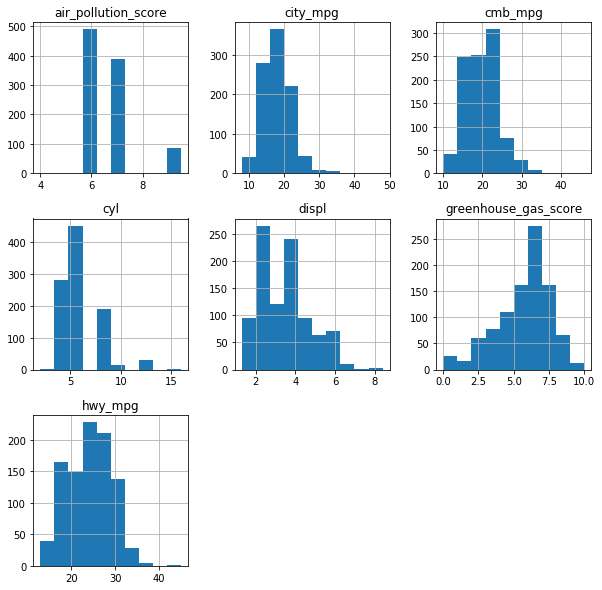

In [61]:
df_08.hist(figsize =(10,10));


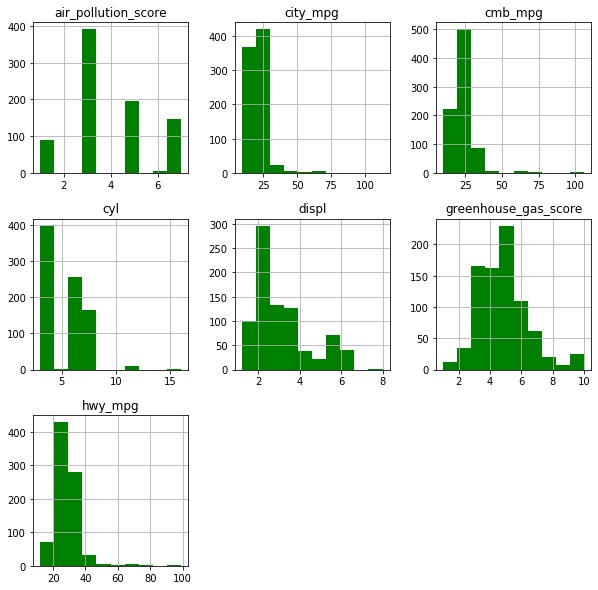

In [62]:
df_18.hist(figsize =(10,10), color = 'green');

__Plot below shows the correlation between displacement and combined mpg.__

Displacement increases and combine mpg decreases. We can observe that displacement and combined mpg are in __negative correlation.__

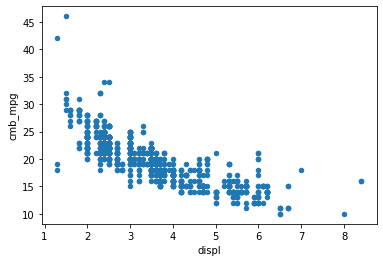

In [63]:
df_08.plot(x='displ', y ='cmb_mpg', kind= ('scatter'));

__Plot below show the correlation between greenhouse gas score and combined mpg.__

As combined mpg increases, greenhouse gas score also increases. We can observe that combined mpg and greenhouse gas score are in __positive correlation.__

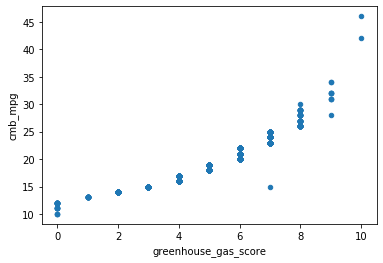

In [64]:
df_08.plot(x='greenhouse_gas_score', y ='cmb_mpg', kind= ('scatter'));

### Q1: Are more unique models using alternative sources of fuel? By how much?

Let's first look at what the sources of fuel are and which ones are alternative sources.

In [65]:
df_08.fuel.value_counts()

Gasoline    961
gas           1
ethanol       1
CNG           1
Name: fuel, dtype: int64

In [66]:
df_18.fuel.value_counts()

Gasoline       746
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. 

In [67]:
# how many unique models used alternate source of fuel in 2008

alt_08 = df_08.query('fuel in ["ethanol", "CNG"]').model.nunique()
alt_08

2

In [68]:
# how many unique models used alternate source of fuel in 2018

alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

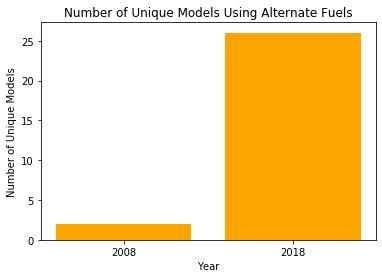

In [69]:
plt.bar(['2008', '2018'], [alt_08, alt_18], color ='orange')
plt.title("Number of Unique Models Using Alternate Fuels")
plt.xlabel("Year")
plt.ylabel('Number of Unique Models')
plt.show();

__Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.__

In [70]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(375, 355)

In [71]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005333333333333333, 0.07323943661971831)

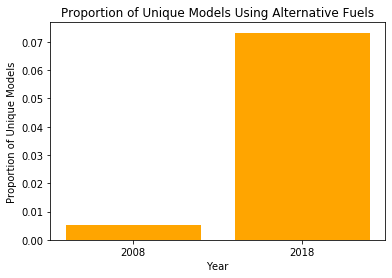

In [72]:
plt.bar(["2008", "2018"], [prop_08, prop_18], color ='orange')
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models")
plt.show();

### Q2: How much have vehicle classes improved in fuel economy?  

Lets look at the average fuel economy for each vehicle class for both years.

In [73]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.470803
large car        18.509091
midsize car      21.632353
minivan          19.117647
pickup           16.144737
small car        21.149390
station wagon    22.366667
van              15.111111
Name: cmb_mpg, dtype: float64

In [74]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.941606
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.235294
station wagon      27.424242
Name: cmb_mpg, dtype: float64

In [75]:
# how much cmb_mpg has increased for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.309253
minivan            1.682353
pickup             2.445007
small SUV               NaN
small car          4.271662
special purpose         NaN
standard SUV            NaN
station wagon      5.057576
van                     NaN
Name: cmb_mpg, dtype: float64

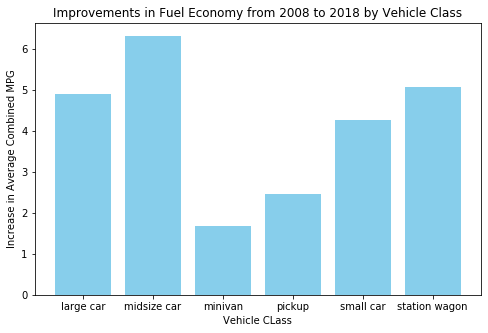

In [76]:
# only plot the classes that exsist in both years

inc.dropna(inplace = True)
plt.subplots(figsize = (8,5))
plt.bar(inc.index, inc, color = 'skyblue')
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle CLass')
plt.ylabel('Increase in Average Combined MPG')
plt.show();



__The Fuel Economy of Vehicle Classes- Midsize Car, Station Wagon, Large Car, Small Car, Pickup and Minivan has increased from 2008 to 2018. Whereas, the Fuel Economy of Vehicle Classes- SUVs, Special Purpose Vehicles and Van has decreased from 2008 to 2018.__               

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [77]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [78]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [79]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,2.604497,4.830688,7.367725,20.978836,28.410053,23.732804,6.867725
std,0.624653,1.002866,1.150927,3.450995,3.082182,3.067764,0.829474
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.300000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [80]:
# smartway labels in 2018
df_18['smartway'].unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [81]:
# get all smart way vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes","Elite"]')

In [82]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,1.790654,3.934579,5.233645,34.962617,41.523364,37.420561,7.934579
std,0.408987,0.418240,1.794012,16.499243,13.146020,14.905385,1.199615
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.800000,4.000000,6.000000,28.000000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.500000,40.500000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [83]:
# get all non smartway vehicles in 2008
non_smart_08 = df_08.query('smartway == "no"')

In [84]:
# get all non smartway vehicles in 2018
non_smart_18 = df_18.query('smartway == "no"')

__Total number of unique models in 2008 and 2018:__

In [85]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(375, 355)

__Total number of SmartWay Vehicles in 2008 and 2018:__

In [86]:
# total smartway unique models each year
sm_08 = smart_08.model.nunique()
sm_18 = smart_18.model.nunique()
sm_08, sm_18

(155, 52)

__Proportion of unique SmartWay Vehicle models:__ 

In [87]:
pr_08 = sm_08/total_08
pr_18 = sm_18/total_18
pr_08,pr_18

(0.41333333333333333, 0.14647887323943662)

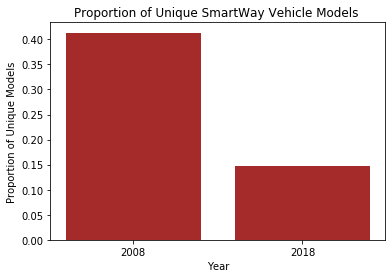

In [88]:
plt.bar(["2008", "2018"], [pr_08, pr_18], color ='brown')
plt.title("Proportion of Unique SmartWay Vehicle Models ")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models")
plt.show();

__From the above graph we can oberve that the proportion of Unique SmartWay Vehicles has decreased from 2008 to 2018.__

Analyze the mean characteristics of both 2008 and 2018 dataset. 

In [89]:
smart_08_mean = smart_08.mean()
smart_08_mean

displ                    2.604497
cyl                      4.830688
air_pollution_score      7.367725
city_mpg                20.978836
hwy_mpg                 28.410053
cmb_mpg                 23.732804
greenhouse_gas_score     6.867725
dtype: float64

In [90]:
smart_18_mean = smart_18.mean()
smart_18_mean

displ                    1.790654
cyl                      3.934579
air_pollution_score      5.233645
city_mpg                34.962617
hwy_mpg                 41.523364
cmb_mpg                 37.420561
greenhouse_gas_score     7.934579
dtype: float64

In [91]:
smart_mean_inc = smart_18_mean - smart_08_mean
smart_mean_inc

displ                   -0.813843
cyl                     -0.896108
air_pollution_score     -2.134080
city_mpg                13.983781
hwy_mpg                 13.113312
cmb_mpg                 13.687757
greenhouse_gas_score     1.066855
dtype: float64

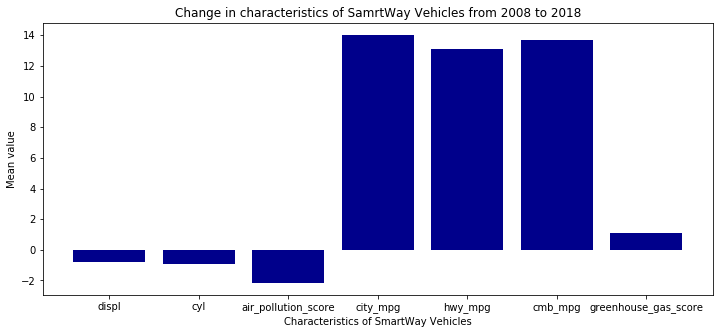

In [92]:
plt.subplots(figsize = (12,5))
plt.bar(smart_mean_inc.index, smart_mean_inc, color = 'darkblue')
plt.title('Change in characteristics of SamrtWay Vehicles from 2008 to 2018')
plt.xlabel('Characteristics of SmartWay Vehicles')
plt.ylabel('Mean value')
plt.show();

__From the above graph we can observe the following:__
* __Cylinder (cyl)__: The number of cylinders used in vehicles has decreased from 2008 to 2018.
* __Air Pollution Score (air_pollution_score)__: Has decreased by 2.13 from 2008 to 2018.
* __Fuel Economy (cmb_mpg)__: Has increased drastically by 13.68 in a span of 10 years.
* __Greenhouse Gas Score (greenhouse_gas_score)__: The mean score has increased by 1.06. 


### Q4: What features are associated with better fuel economy?

Determine the vehicles whose Fuel Economy is greater that the mean Fuel Economy for respective year. 

In [93]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,2.664717,4.892788,7.005848,20.327485,27.617934,23.003899,6.643275
std,0.665253,1.035600,1.162972,3.207956,3.058389,2.934171,0.807339
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [94]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,1.965749,4.021407,4.862385,27.467890,35.302752,30.409786,6.327217
std,0.398372,0.466189,1.860806,11.050277,9.038606,10.096936,1.412030
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [95]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(375, 355)

In [96]:
# total unique models whose fuel economy is greater than mean fuel economy each year
t_08 = top_18.model.nunique()
t_18 = top_18.model.nunique()
t_08, t_18

(161, 161)

In [97]:
# proportion of unique models whose fuel economy is greater than the mean fuel economy/ total unique models each year
pro_08 = t_08/total_08
pro_18 = t_18/total_18
pro_08,pro_18

(0.42933333333333334, 0.4535211267605634)

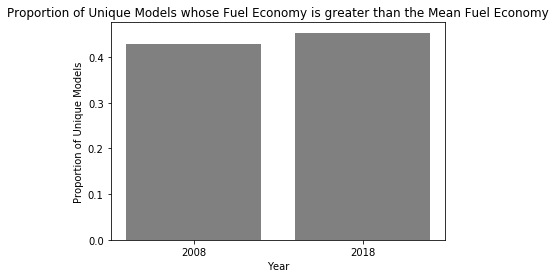

In [98]:
plt.bar(["2008", "2018"], [pro_08, pro_18], color ='grey')
plt.title("Proportion of Unique Models whose Fuel Economy is greater than the Mean Fuel Economy")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models")
plt.show();

In [99]:
top_mean_inc = top_18.mean() - top_08.mean()
top_mean_inc

displ                  -0.698968
cyl                    -0.871381
air_pollution_score    -2.143463
city_mpg                7.140405
hwy_mpg                 7.684819
cmb_mpg                 7.405887
greenhouse_gas_score   -0.316058
dtype: float64

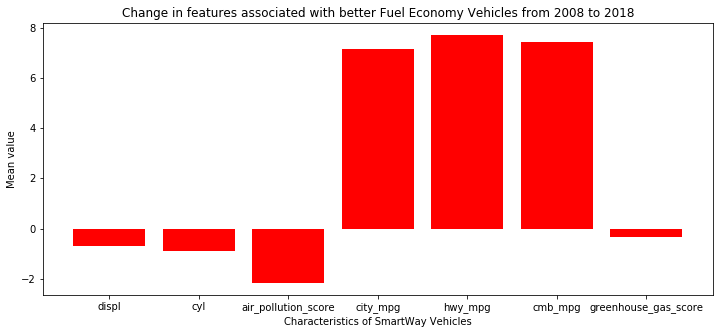

In [100]:
plt.subplots(figsize = (12,5))
plt.bar(top_mean_inc.index, top_mean_inc, color = 'red')
plt.title('Change in features associated with better Fuel Economy Vehicles from 2008 to 2018')
plt.xlabel('Characteristics of SmartWay Vehicles')
plt.ylabel('Mean value')
plt.show();

__From the above graph we can observe that the vehicles with better Fuel Economy have also reduced Air Pollution Score and Greenhouse Gas Score from the year 2008 to 2018.__


### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?
This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. To do this, let's first learn about merges.

#### Create combined dataset

In [101]:
# rename 2008 columns
df_08.rename(columns = lambda x: x[:10] + "_2008", inplace = True)

In [102]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [103]:
# merge datasets
df_combined = df_08.merge(df_18, left_on = 'model_2008', right_on = 'model', how = 'inner')

In [104]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


#### Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [105]:
model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [106]:
model_mpg.shape

(72, 2)

#### Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [107]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [108]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


#### Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [109]:
max_change = model_mpg['mpg_change'].max()
max_change

16.53333333333334

In [110]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


__We can observe that there are 72 unique models that are produced in 2008 and are still being produced in 2018. 
Volvo XC 90 model is one such model. Volvo XC 90 has maximum improvement in Fuel economy from 2008 to 2018.__